In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Machine Learning\real_estate_5000_rows.csv')

In [6]:
df.head()

,Price,Location,Square_Feet,Bedrooms,Bathrooms,Year_Built,Lot_Size,Neighborhood,City
0,439737,Central,3266,3,4,2004,5102,Greenwood,Portland
1,388938,Northwest,2238,3,1,1984,4406,Greenwood,Portland
2,451815,Central,2646,4,1,1998,5669,Hawthorne,Portland
3,521842,Southwest,2292,3,2,2006,5165,Brighton,Seattle
4,381267,Central,2399,5,2,1992,5043,Greenwood,Portland


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         5000 non-null   int64 
 1   Location      5000 non-null   object
 2   Square_Feet   5000 non-null   int64 
 3   Bedrooms      5000 non-null   int64 
 4   Bathrooms     5000 non-null   int64 
 5   Year_Built    5000 non-null   int64 
 6   Lot_Size      5000 non-null   int64 
 7   Neighborhood  5000 non-null   object
 8   City          5000 non-null   object
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [8]:
df.describe()

,Price,Square_Feet,Bedrooms,Bathrooms,Year_Built,Lot_Size
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,400447.655400,2199.028400,3.569200,2.42540,2001.110600,5499.904000
std,79718.384429,399.939063,0.867042,0.81521,12.384016,998.540217
min,140698.000000,631.000000,2.000000,1.00000,1980.000000,1034.000000
25%,347367.250000,1935.000000,3.000000,2.00000,1990.000000,4828.750000
50%,401077.000000,2197.000000,4.000000,2.00000,2001.000000,5491.000000
75%,453280.000000,2466.000000,4.000000,3.00000,2011.000000,6167.000000
max,714099.000000,3551.000000,5.000000,4.00000,2022.000000,9042.000000


In [9]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

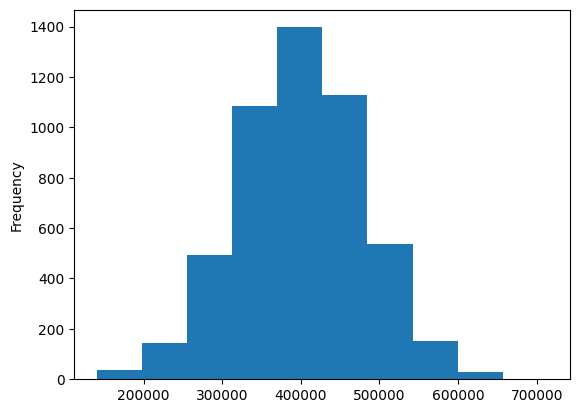

In [10]:
df['Price'].plot(kind='hist')

<Axes: ylabel='Frequency'>

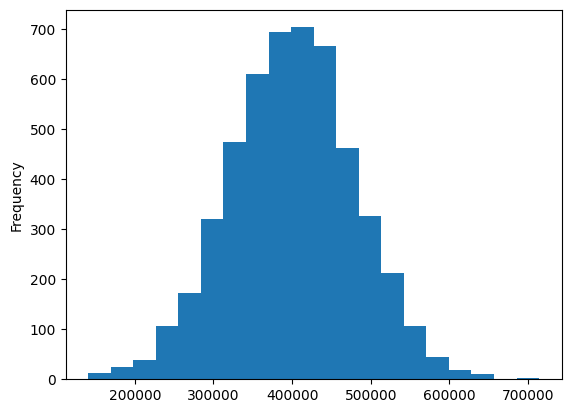

In [13]:
## using bins to break it down to smaller values
df['Price'].plot(kind='hist', bins=20)

In [14]:
## To bring out the list and tables of only interger and floats
df.select_dtypes(include=[int, float])

,Price,Square_Feet,Bedrooms,Bathrooms,Year_Built,Lot_Size
0,439737,3266,3,4,2004,5102
1,388938,2238,3,1,1984,4406
2,451815,2646,4,1,1998,5669
3,521842,2292,3,2,2006,5165
4,381267,2399,5,2,1992,5043
...,...,...,...,...,...,...
4995,396082,1002,3,3,2020,5182
4996,456912,1867,3,3,1989,6594
4997,649032,2003,4,2,2020,6071
4998,464642,2753,3,4,2002,7482


In [ ]:
## To bring out only categorical values removing numbers in the table
df.select_dtypes(exclude=[int, float])

,Location,Neighborhood,City
0,Central,Greenwood,Portland
1,Northwest,Greenwood,Portland
2,Central,Hawthorne,Portland
3,Southwest,Brighton,Seattle
4,Central,Greenwood,Portland
...,...,...,...
4995,Southwest,Greenwood,Portland
4996,Northeast,Hawthorne,Seattle
4997,Northwest,Greenwood,Portland
4998,Northeast,Hawthorne,San Jose


In [16]:
## To extract column from a dataframe
df.columns

Index(['Price', 'Location', 'Square_Feet', 'Bedrooms', 'Bathrooms',
       'Year_Built', 'Lot_Size', 'Neighborhood', 'City'],
      dtype='object')

In [17]:
## To covert the columns to list in dataframe
df.select_dtypes(include=[int, float]).columns.tolist()

['Price', 'Square_Feet', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Lot_Size']

In [ ]:
## Assigning the perivious code to a name
Column_To_Plot = df.select_dtypes(include=[int, float]).columns.tolist()

In [19]:
## Calling out the name been assigned to
Column_To_Plot

['Price', 'Square_Feet', 'Bedrooms', 'Bathrooms', 'Year_Built', 'Lot_Size']

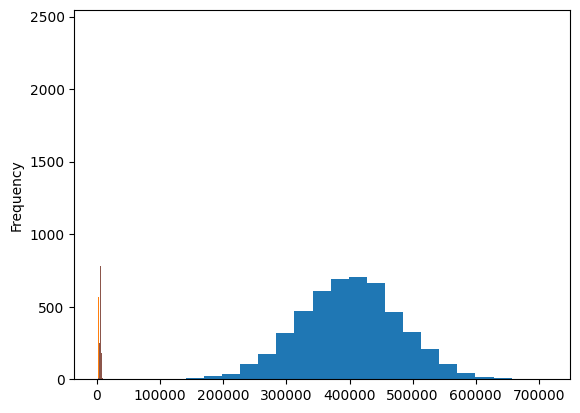

In [ ]:
## where it loops (chooses every column in the table to plot one by one without having to do it one after the other d other using loop)
## Showing all the graphs on one Chart
for col in Column_To_Plot:
    df[col].plot(kind='hist', bins=20)


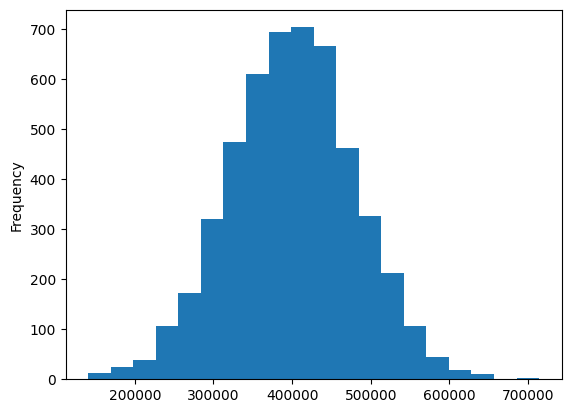

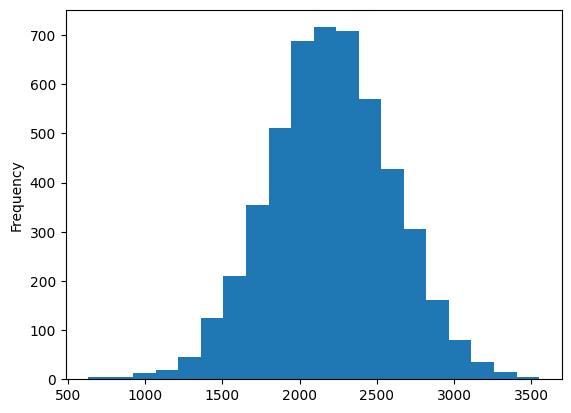

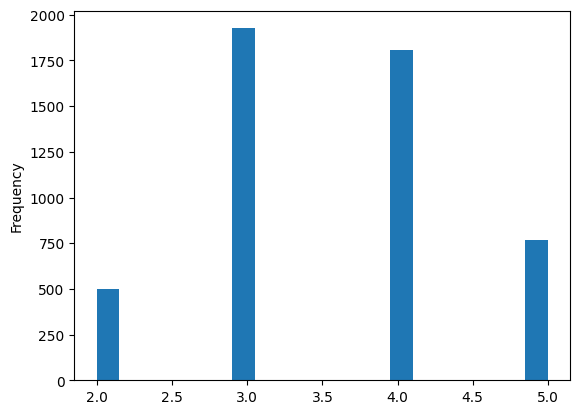

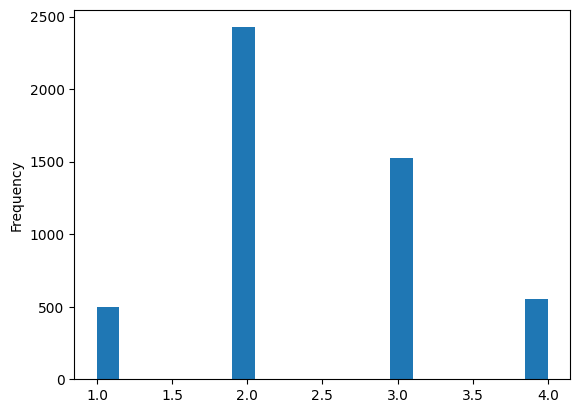

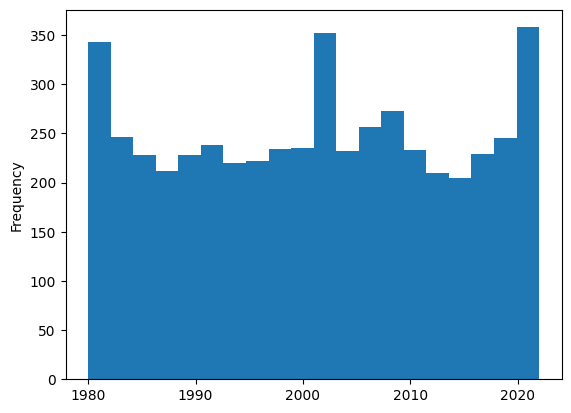

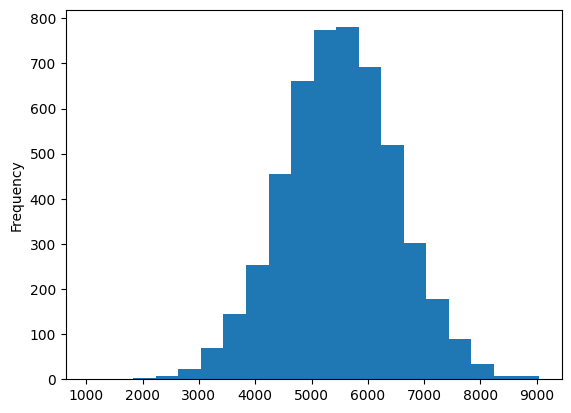

In [ ]:
## Using or makingt the graphs or charts to show one by one for each column
for col in Column_To_Plot:
    df[col].plot(kind='hist', bins=20)
    plt.show()

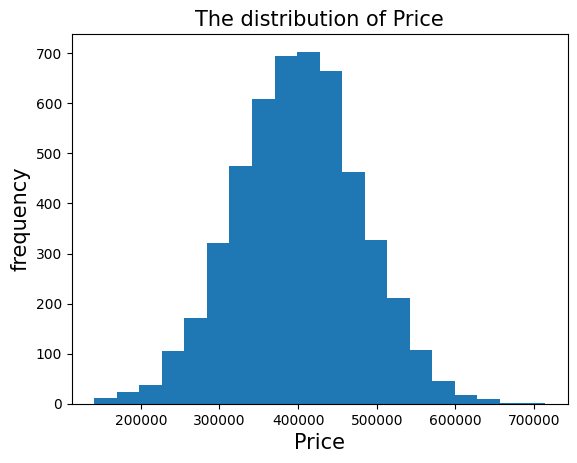

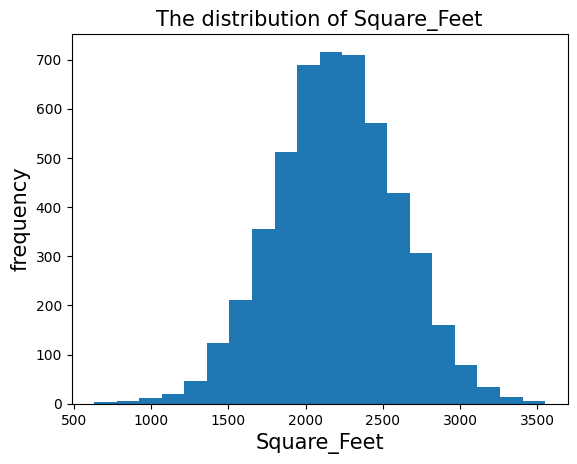

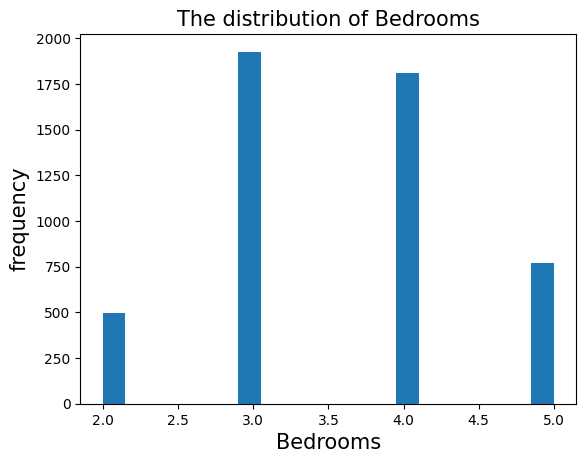

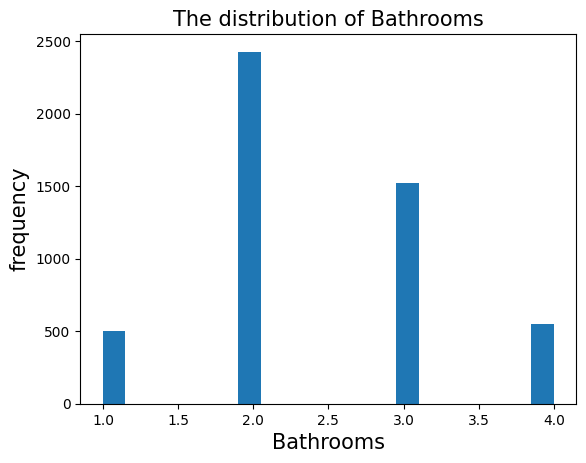

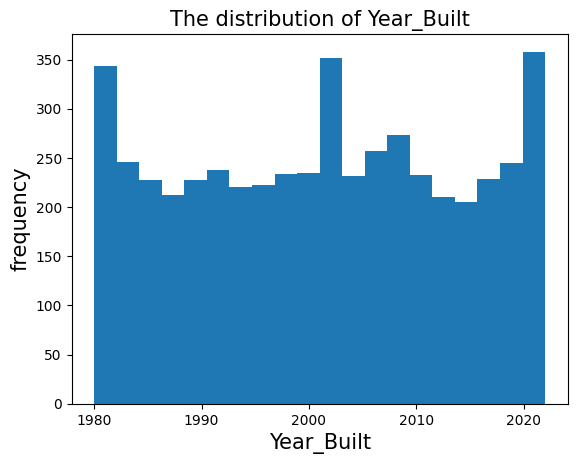

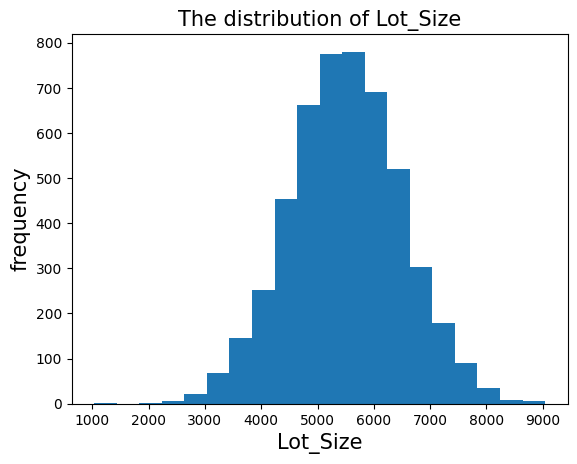

In [27]:
## To show title on the chart plotted and axis labesl
for col in Column_To_Plot:
    df[col].plot(kind='hist', bins=20)
    plt.title(f"The distribution of {col}", fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel("frequency", fontsize=15)
    plt.show()

In [28]:
df.select_dtypes(include='object').columns

Index(['Location', 'Neighborhood', 'City'], dtype='object')

In [29]:
cat_col = df.select_dtypes(include='object').columns.tolist()

In [30]:
cat_col

['Location', 'Neighborhood', 'City']

In [31]:
"_"* 10

'__________'

In [32]:
for col in cat_col:
    print(df[col].unique())
    print(df[col].value_counts())
    print("_" * 50)

['Central' 'Northwest' 'Southwest' 'Northeast']
Location
Northwest    1311
Northeast    1248
Central      1245
Southwest    1196
Name: count, dtype: int64
__________________________________________________
['Greenwood' 'Hawthorne' 'Brighton' 'Capitol Hill']
Neighborhood
Brighton        1277
Capitol Hill    1255
Hawthorne       1237
Greenwood       1231
Name: count, dtype: int64
__________________________________________________
['Portland' 'Seattle' 'San Francisco' 'San Jose']
City
Seattle          1290
San Francisco    1243
San Jose         1240
Portland         1227
Name: count, dtype: int64
__________________________________________________


In [33]:
pd.get_dummies(df['Location'])

,Central,Northeast,Northwest,Southwest
0,True,False,False,False
1,False,False,True,False
2,True,False,False,False
3,False,False,False,True
4,True,False,False,False
...,...,...,...,...
4995,False,False,False,True
4996,False,True,False,False
4997,False,False,True,False
4998,False,True,False,False


In [34]:
## Converting the previous code to integer
pd.get_dummies(df['Location']).astype(int)

,Central,Northeast,Northwest,Southwest
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
4995,0,0,0,1
4996,0,1,0,0
4997,0,0,1,0
4998,0,1,0,0


In [35]:
## To pick a particular column or drop a certain column
## Converting the previous code to integer
pd.get_dummies(df['Location'], drop_first=True).astype(int)

,Northeast,Northwest,Southwest
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
4995,0,0,1
4996,1,0,0
4997,0,1,0
4998,1,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from sklearn.preprocessing import MinMaxScalar